In [59]:
import pandas as pd

In [60]:
Netflix = pd.read_csv("netflix.csv")

In [61]:
Netflix.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [62]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [63]:
Netflix = Netflix.rename(columns = lambda x: x.title())

In [64]:
Netflix.isnull().sum()

Show_Id         0
Type            0
Title           0
Director        0
Country         0
Date_Added      0
Release_Year    0
Rating          0
Duration        0
Listed_In       0
dtype: int64

In [65]:
Netflix["Show_Id"].unique()

array(['s1', 's3', 's6', ..., 's8801', 's8784', 's8786'], dtype=object)

In [66]:
Netflix = Netflix.drop("Show_Id", axis = 1)

In [67]:
Netflix["Type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [68]:
Netflix["Director"].unique()

array(['Kirsten Johnson', 'Julien Leclercq', 'Mike Flanagan', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [69]:
Netflix["Country"].unique()
#Outliers:
#1. West Germany
#2. Soviet Union
#3. Not Given (Unspecified)

array(['United States', 'France', 'Brazil', 'United Kingdom', 'India',
       'Germany', 'Pakistan', 'Not Given', 'China', 'South Africa',
       'Japan', 'Nigeria', 'Spain', 'Philippines', 'Australia',
       'Argentina', 'Canada', 'Hong Kong', 'Italy', 'New Zealand',
       'Egypt', 'Colombia', 'Mexico', 'Belgium', 'Switzerland', 'Taiwan',
       'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Kuwait', 'Malaysia', 'Vietnam', 'Lebanon', 'Romania',
       'Syria', 'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria',
       'Turkey', 'Czech Republic', 'Cameroon', 'Netherlands', 'Ireland',
       'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh', 'Portugal',
       'Hungary', 'Norway', 'Singapore', 'Iceland', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Ghana', 'Zimbabwe', 'Israel', 'Finland',
       'Denmark', 'Paraguay', 'Cambodia', 'Georgia', 'Soviet Union',
       'Greece', 'West Germany', 'Iran', 'Venezuela', 'Slovenia',
       'Gua

In [70]:
#Replaces outliers in Country column
dict1 = {"West Germany" : "Germany", "Unspecified" : "Soviet Union", "Not Given" : "Unspecified"}
Netflix = Netflix.replace({"Country": dict1})

In [71]:
#To check unique values in LIsted in column
Netflix["Listed_In"].unique()

array(['Documentaries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'TV Dramas, TV Horror, TV Mysteries',
       'Children & Family Movies, Comedies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Children & Family Movies, Comedies, Music & Musicals',
       'Dramas, International Movies',
       'Children & Family Movies, Music & Musicals',
       'Dramas, International Movies, Music & Musicals', 'Movies',
       'Comedies', 'Docuseries, Reality TV',
       'British TV Shows, Crime TV Shows, Docuseries',
       'Children & Family Movies', "Kids' TV",
       'Documentaries, International Movies',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Comedies, International Movies, Romantic Movies',
       'Horror Movies, Sci-Fi & Fantasy', 'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'TV Comedies', 'I

In [72]:
#To Check Unique values in Rating column
Netflix["Rating"].unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [73]:
#Replace the Abbrevated values to make more meaning
dict2= {"TV-MA" : "Mature Audience", "TV-PG" : "Parental Guidance", "PG" : "Parental Guidance", "TV-G" : "General Audience", "R" : "R(Restricted)",
       "TV-G" : "General Audience", "NR" : "Not Rated", "TV-Y" : "Children Only", "TV-Y7-FV" : "TV-Y7 (Fantasy Violence)", "UR" : "Unrated"}
Netflix = Netflix.replace({"Rating" : dict2})

In [74]:
#Useless for data analysis...on my opinion
Top_Shows = Netflix["Title"].value_counts().head(5).reset_index()
Top_Shows

,Title,count
0,9-Feb,2
1,15-Aug,2
2,22-Jul,2
3,Dick Johnson Is Dead,1
4,SGT. Will Gardner,1


In [75]:
import matplotlib.pyplot as plt

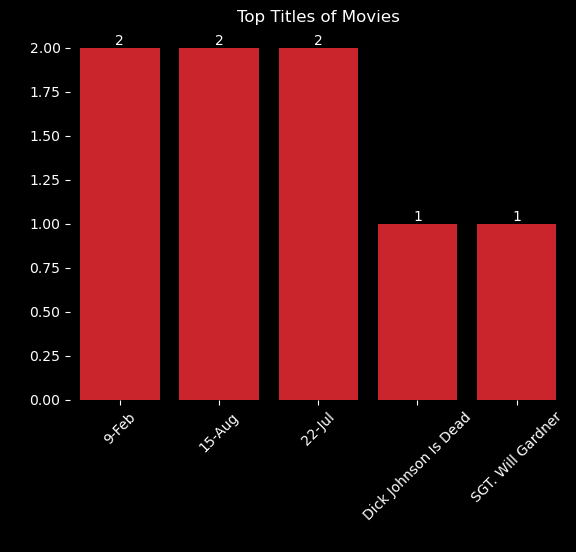

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
#Assign the bar chart Syntax a variable used for formatting later
barplot = sns.barplot(x = "Title", y = "count", data = Top_Shows, color = "#e50914")

#Used for chart Title formatting
barplot.set_title("Top Titles of Movies", color ="White")

#Used to change background Color of chart
barplot.set_facecolor("black")
barplot.figure.patch.set_facecolor("black")
#Used to change text color of X and Y values
barplot.tick_params(axis ="x", colors = "white")
barplot.tick_params(axis = "y", colors ="white")

#USed for Data labels
for p in barplot.patches:
    barplot.text(p.get_x() + p.get_width() / 2, p.get_height(), 
                 round(p.get_height(), ), 
                 color='white', 
                 ha='center', 
                 va='bottom')

#Used for Removing Border lines 
for spine in barplot.spines.values():
    spine.set_visible(False)
#Used for removing gridlines
barplot.grid(False)

#used for removing border lines 
for patch in barplot.patches:
    patch.set_edgecolor('none') 
  
plt.xticks(rotation =45)
plt.show()

In [77]:
#Shows Show Distribution by type(Movies or Tv Shows)
Show_Distribution = Netflix["Type"].value_counts()
Show_Distribution

Type
Movie      6126
TV Show    2664
Name: count, dtype: int64

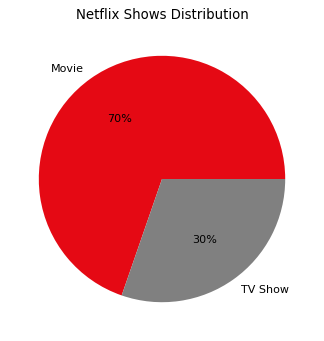

In [78]:
import matplotlib.pyplot as plt
#Assign Figure size a variable so that it can be used later when formatting
ax = plt.figure(figsize=(8,5), dpi = 80)
#Assign The pie chart Syntax a variable so that is can be formatted later
pieplot =plt.pie(Show_Distribution, labels = Show_Distribution.index, autopct = "%1.0f%%",  colors = ["#e50914", "grey"] )
#For Title
plt.title("Netflix Shows Distribution")
#To change Chart Background color
ax.set_facecolor("white")
#plt.savefig("pie.png", dpi = 100, bbox_inches = "tight", facecolor ="red", transparent=True) #to Save
plt.show()

In [79]:
#Top 10 Countries that stream netflix
Top_10_Countries= Netflix["Country"].value_counts().head(10).reset_index()
Top_10_Countries

,Country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Unspecified,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


In [80]:
#This is to check the Number Country Distribution by Show types
country_counts = Netflix.groupby('Type')['Country'].nunique()
country_counts

Type
Movie      78
TV Show    59
Name: Country, dtype: int64

In [81]:
#To check the director with the highest movie productions but seeing most of the data is unspecified, i didn't bother using it
Netflix["Director"].value_counts().head(5)

Director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Name: count, dtype: int64

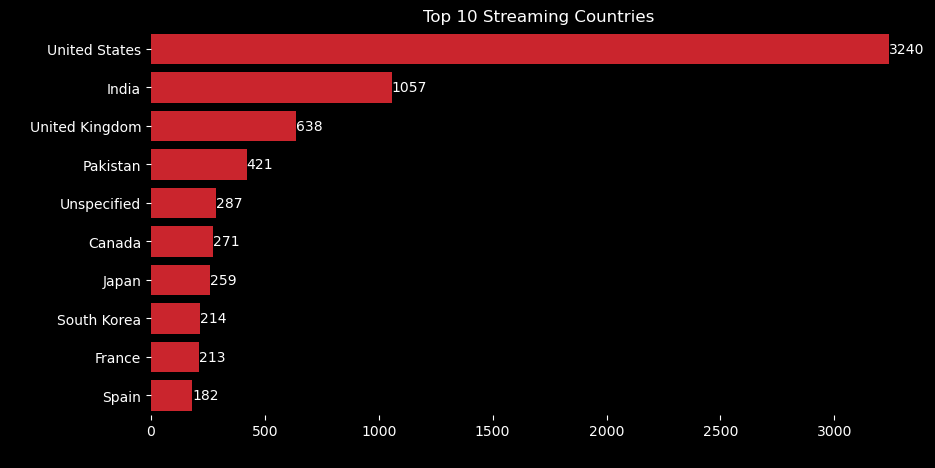

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(10,5))
#Give the Chart Syntax a variable name so it can be called for formating later in the code
barplot = sns.barplot(x = "count", y = "Country", data = Top_10_Countries, color= "#e50914")
#To change the color of the plot background
barplot.set_facecolor("Black")
#To change the color of the Axis labels and Title
barplot.tick_params(axis = "x", colors = "white")
barplot.tick_params(axis= "y", colors = "white")
barplot.set_title("Top 10 Streaming Countries" ,color = "white")

# For data labels
for index, row in Top_10_Countries.iterrows():
    barplot.text(row['count'], index, round(row['count'], 2), color='white', ha="left", va="center")

#For removing gridlines
barplot.grid(False)

#For datalabels on the bars
for spine in barplot.spines.values():
    spine.set_visible(False)


for patch in barplot.patches:
    patch.set_edgecolor('none') 
    
#To change the background color of the chart
barplot.figure.patch.set_facecolor("Black")

#To format Chart Title color
plt.title("Top 10 Streaming Countries")
plt.show()

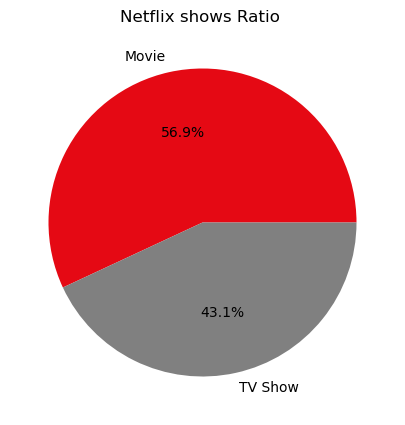

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
#Give the Figure size a variable to be called later when formatting the chart
ax=plt.figure(figsize =(10,5))
pieplots = plt.pie(country_counts,labels= country_counts.index, autopct = "%1.1f%%", colors = ["#e50914", "grey"] )

#to change Chart background Color and main background color
ax.set_facecolor('black')
ax.patch.set_facecolor("white")

#to format Title Color
plt.title("Netflix shows Ratio ", color = "black")
plt.show()

In [84]:
Ratings = Netflix["Rating"].value_counts().head(5).reset_index()
Ratings

,Rating,count
0,Mature Audience,3205
1,TV-14,2157
2,Parental Guidance,1148
3,R(Restricted),799
4,PG-13,490


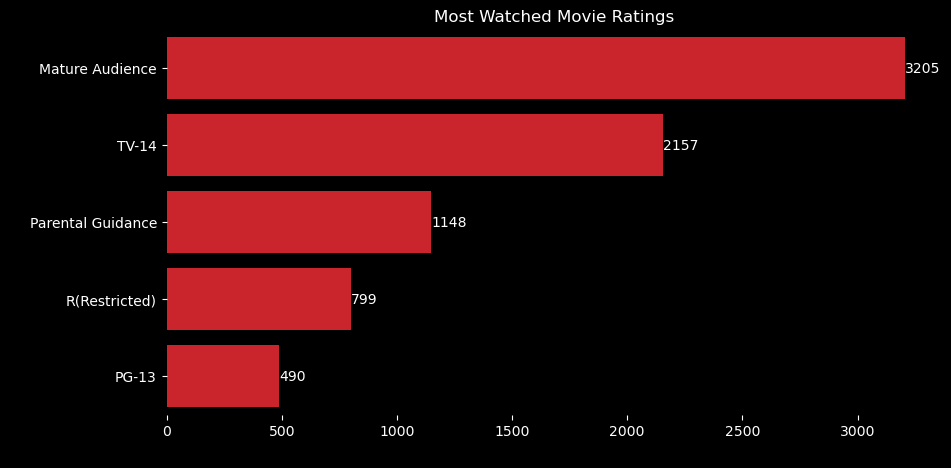

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(10,5))
barplot = sns.barplot(x = "count", y = "Rating", data = Ratings, color= "#e50914")
#To change the color of the plot background
barplot.set_facecolor("Black")
#To change the color of the Axis labels and Title
barplot.tick_params(axis = "x", colors = "White")
barplot.tick_params(axis= "y", colors = "white")
barplot.set_title("Top 10 Streaming Ratings" ,color = "white")

# For data labels on each bar
for index, row in Ratings.iterrows():
    barplot.text(row['count'], index, round(row['count'], 2), color='white', ha="left", va="center")

#To Remove Gridlines
barplot.grid(False)

#To Remove Border Lines on the chart
for spine in barplot.spines.values():
    spine.set_visible(False)


for patch in barplot.patches:
    patch.set_edgecolor('none') 
    
#To Change Chart Background
barplot.figure.patch.set_facecolor("Black")

#To Format Color of Title
plt.title("Most Watched Movie Ratings")
plt.show()

In [86]:
Rating_By_Countries = Netflix.groupby("Rating")["Country"].nunique().head(10).sort_values(ascending = False).reset_index()
Rating_By_Countries

,Rating,Country
0,Mature Audience,74
1,TV-14,60
2,Parental Guidance,48
3,R(Restricted),40
4,General Audience,31
5,PG-13,29
6,Children Only,24
7,Not Rated,20
8,G,8
9,NC-17,3


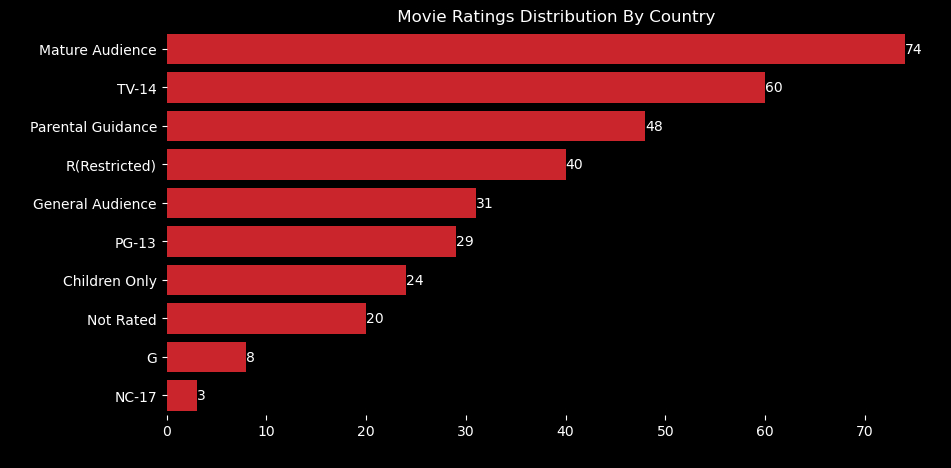

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
#Gives the figure Size a variable name so that it can be called later
plt.figure(figsize =(10,5))
barplot = sns.barplot(x = "Country", y = "Rating", data = Rating_By_Countries, color= "#e50914")
#To change the color of the plot background
barplot.set_facecolor("Black")
#To change the color of the Axis labels and Title
barplot.tick_params(axis = "x", colors = "White")
barplot.tick_params(axis= "y", colors = "white")
barplot.set_title("Top 10 Streaming Ratings" ,color = "white")

# For data labels
for index, row in Rating_By_Countries.iterrows():
    barplot.text(row['Country'], index, round(row['Country'], 2), color='white', ha="left", va="center")

#For Gridlines
barplot.grid(False)

#For Border Lines on the charts
for spine in barplot.spines.values():
    spine.set_visible(False)

for patch in barplot.patches:
    patch.set_edgecolor('none') 

#To Change Chart Background
barplot.figure.patch.set_facecolor("Black")

#To Change The color text of Title
plt.title(" Movie Ratings Distribution By Country")
plt.show()

In [88]:
Movie_Release_Year=Netflix["Release_Year"].value_counts().head(5).reset_index()
Movie_Release_Year

,Release_Year,count
0,2018,1146
1,2017,1030
2,2019,1030
3,2020,953
4,2016,901


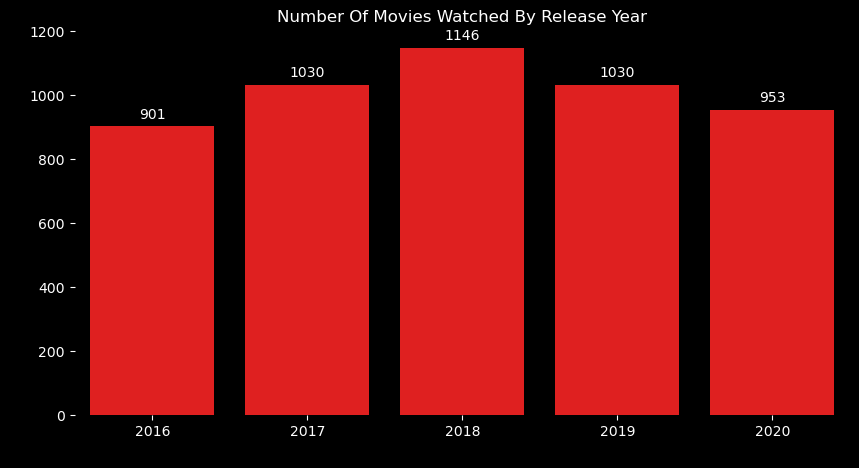

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
#Gives the figure Size a variable name so that it can be called later
ax = plt.figure(figsize = (10,5))

#Gives the Barchart Syntax a variable name so that it can be called later on
pieplot = sns.barplot(x = "Release_Year", y = "count" ,data = Movie_Release_Year, color = "red")

#Changes the background color of the chart and the plot
pieplot.set_facecolor("black")
pieplot.figure.patch.set_facecolor("black")

#Changes the color text of the X and Y axis parameters or Values
pieplot.tick_params(axis = "x", colors = "white")
pieplot.tick_params(axis = "y", colors = "white")

#Gives the title a Color based on your preference
pieplot.set_title("Number Of Movies Watched By Release Year", color ="white")

#It is used for the data labels that show on each bar
for p in pieplot.patches:
    pieplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', 
                     va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     color='white')

#It is used for the Border lines on the Bars and the Chart
for spine in pieplot.spines.values():
    spine.set_visible(False)

for patch in pieplot.patches:
    patch.set_edgecolor('none')

#Removes Grid lines on the plot
pieplot.grid(False)
plt.show()


In [90]:
#To turn to date 
Netflix["Release_Year"] = pd.to_numeric(Netflix["Release_Year"], errors ="coerce")

In [91]:
Netflix["Year_Added"] = pd.to_datetime(Netflix["Date_Added"]).dt.year
Netflix["Year_Added"] = pd.to_numeric(Netflix["Year_Added"], errors = "coerce")

In [92]:
Years_Diff = Netflix["Year_Added"] - Netflix["Release_Year"]

In [93]:
Netflix["Year_Diff"] = Netflix["Year_Added"] - Netflix["Release_Year"]

In [94]:
Years_Diff= Netflix["Year_Diff"].value_counts().head(10).reset_index()
Years_Diff

,Year_Diff,count
0,0,3239
1,1,1584
2,2,713
3,3,489
4,4,367
5,5,261
6,6,250
7,7,187
8,8,185
9,9,161


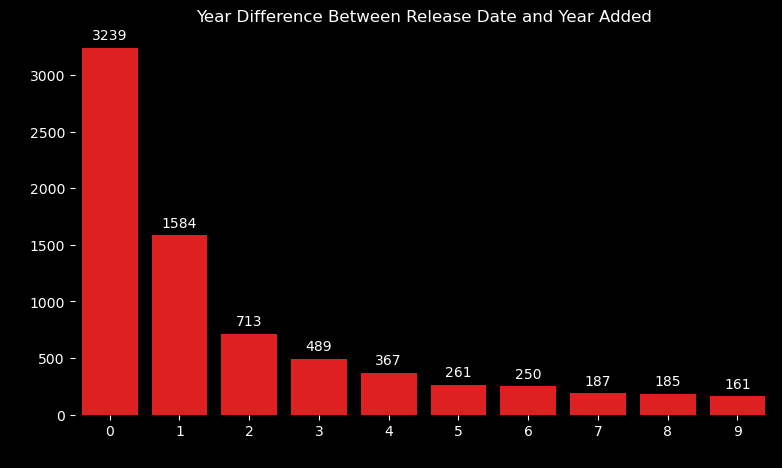

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
#Gives the figure Size a variable name so that it can be called later
ax = plt.figure(figsize =(9,5))

#Gives the Barchart Syntax a variable name so that it can be called later on
barplot = sns.barplot(x = "Year_Diff", y = "count", data = Years_Diff, color = "red")

#Changes the background color of the chart and the plot 
barplot.set_facecolor("black")
barplot.figure.patch.set_facecolor("black")

#Changes the color text of the X and Y axis parameters or Values
barplot.tick_params(axis = "x", colors = "white")
barplot.tick_params(axis = "y", colors = "white")

#It is used for the data labels that show on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha = 'center', 
                     va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     color='white')

#It is used for the Border lines on the Bars and the Chart
for spine in barplot.spines.values():
    spine.set_visible(False)

for patch in barplot.patches:
    patch.set_edgecolor('none')

#Removes Grid lines on the plot
barplot.grid(False)
#Gives the title a Color based on your preference
barplot.set_title("Year Difference Between Release Date and Year Added", color ="white")

plt.show()